# [Chart Pattern Detection](https://analyzingalpha.com/blog/algorithmic-chart-pattern-detection)

In [230]:
import pandas as pd
from scipy.signal import argrelextrema
# from positions.securities import get_security_data

import numpy as np
import pandas_ta as ta
import matplotlib.pyplot as plt
import mplfinance as mpf

# pd.set_option("display.precision", 4)

#### Get The Data

In [231]:
# df = pd.DataFrame()
# # df = df.ta.ticker("GC=F", period="2y", interval="1h")
# df = df.ta.ticker("GC=F", period="1y", interval="1d")
# df.drop(['Dividends', 'Stock Splits'], axis=1, inplace=True)
# df.to_csv("../cookbook_data/owndata/Gold_1d_yahoo.csv")

In [232]:
df = pd.read_csv("../cookbook_data/owndata/Gold_1d_yahoo.csv", index_col=0, parse_dates=True)
df = df.round(3)
type(df.index)

pandas.core.indexes.datetimes.DatetimeIndex

#### Find the Minama and Maxima

In [233]:
local = df[-100:]

local_max, local_min = argrelextrema(local['High'].values, np.greater)[0], argrelextrema(local['Low'].values, np.less)[0]
# local_max, local_min

In [234]:
highs, lows = local.iloc[local_max,:].High, local.iloc[local_min,:].Low
# type(highs.index)

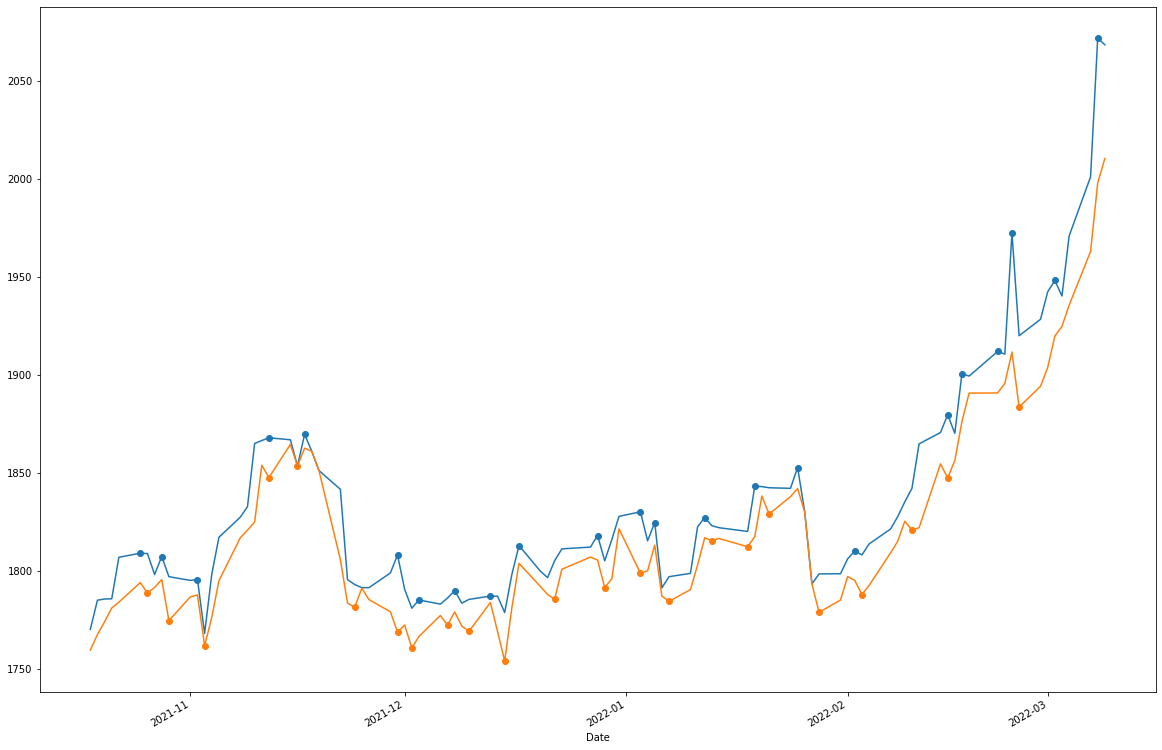

In [235]:
fig = plt.figure(figsize=[20,14])
local['High'].plot()
local['Low'].plot()

plt.scatter(highs.index,highs)
plt.scatter(lows.index,lows)

#### Smoothing the Noise
- non-parametric kernel regression
    + Nonparametric means the data does not fit a normal distribution. We know this. Stock price prediction is complex.
    + In nonparametric statistics, a kernel is a weighting function.
    + A regression predicts the value of predictor based on information in the data.
- approximate a price average based on prices near the predicted price using a weighting the closest prices more heavily

<AxesSubplot:xlabel='Date'>

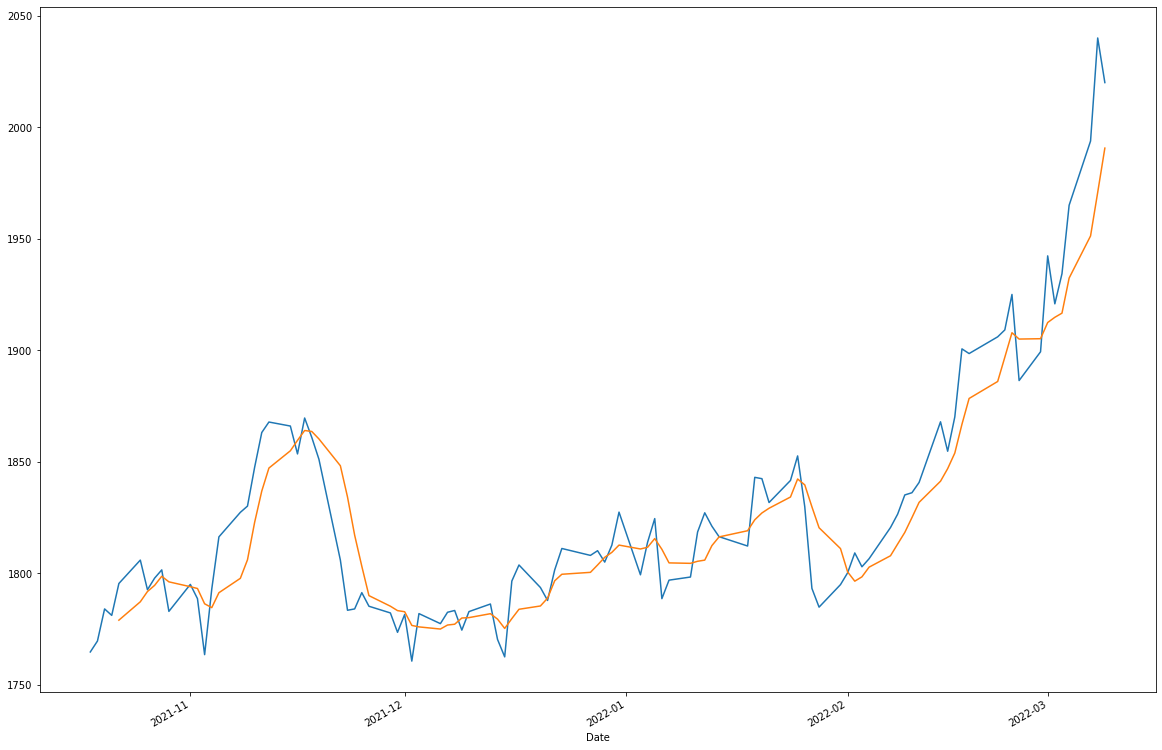

In [236]:
fig = plt.figure(figsize=[20,14])
local['Close'].plot()
local['Close'].rolling(window=5).mean().plot()


In [260]:
from statsmodels.nonparametric.kernel_regression import KernelReg

In [269]:
prices_ = local['Close']
prices_.dtypes
# prices_.index.values

dtype('float64')

<AxesSubplot:xlabel='Date'>

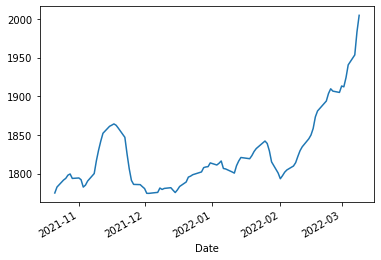

In [270]:
# kr = KernelReg(prices_.values, prices_.index, var_type='c')

# f = kr.fit([prices_.index.values])

local['Close'].rolling(window=4).mean().plot()

# smooth_prices = pd.Series(data=f[0], index=local.index)
# smooth_prices.plot()